In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from inspect import signature as sig
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# < 결정 트리 알고리즘 (분류용/회귀용 모델) >

1. 분류 - DecisionTreeClassifier

In [2]:
import graphviz

In [ ]:
mglearn.plots.plot_animal_tree()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)
print(tree_model.predict(X_test))
print(tree_model.score(X_train, y_train))
print(tree_model.score(X_test, y_test))

[1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1]
1.0
0.9370629370629371


In [5]:
tree_model2 = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_model2.fit(X_train, y_train)
print(tree_model2.score(X_train, y_train))
print(tree_model2.score(X_test, y_test))

0.9882629107981221
0.951048951048951


In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file="tree.dot", class_names = ["-", "+"], feature_names=cancer.feature_names,impurity=False, filled=True)

In [7]:
# import graphviz # -->FileNotFoundError 계속 이 에러 뜨네...

# with open("tree.dot") as f :
#     dot_graph = f.read()
#     display(graphviz.Source(dot_graph))

In [8]:
display("feature importances : ", tree_model.feature_importances_)

'feature importances : '

array([0.        , 0.00752597, 0.        , 0.        , 0.00903116,
       0.        , 0.00752597, 0.        , 0.        , 0.        ,
       0.00975731, 0.04630969, 0.        , 0.00238745, 0.00231135,
       0.        , 0.        , 0.        , 0.        , 0.00668975,
       0.69546322, 0.05383211, 0.        , 0.01354675, 0.        ,
       0.        , 0.01740312, 0.11684357, 0.01137258, 0.        ])

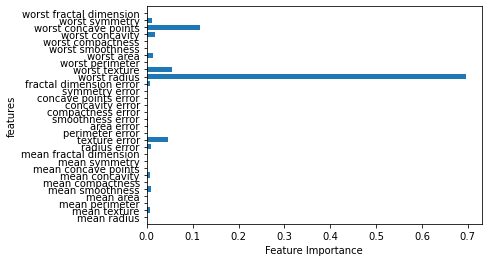

In [26]:
def plot_feature_importances_cancer(model) : 
    n_feature = cancer.data.shape[1]
    plt.barh(range(model.n_features_), model.feature_importances_, align='center')
    plt.yticks(np.arange(model.n_features_), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("features")
    plt.ylim(-1, model.n_features_)
    
plot_feature_importances_cancer(tree_model)

In [22]:
print(tree_model.classes_)
print(tree_model.n_classes_)
print(tree_model.max_features_)
print(tree_model.n_outputs_)
print(tree_model.n_features_)

[0 1]
2
30
1
30


Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

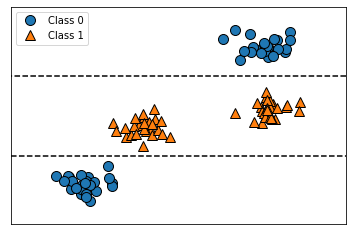

In [14]:
tree = mglearn.plots.plot_tree_not_monotone()
display (tree)

# 결정 트리의 앙상블(2)

1. 랜덤 포레스트 - 분류 : RandomForestClassifier, 회귀 : RandomForesRegressor

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise =0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [20]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

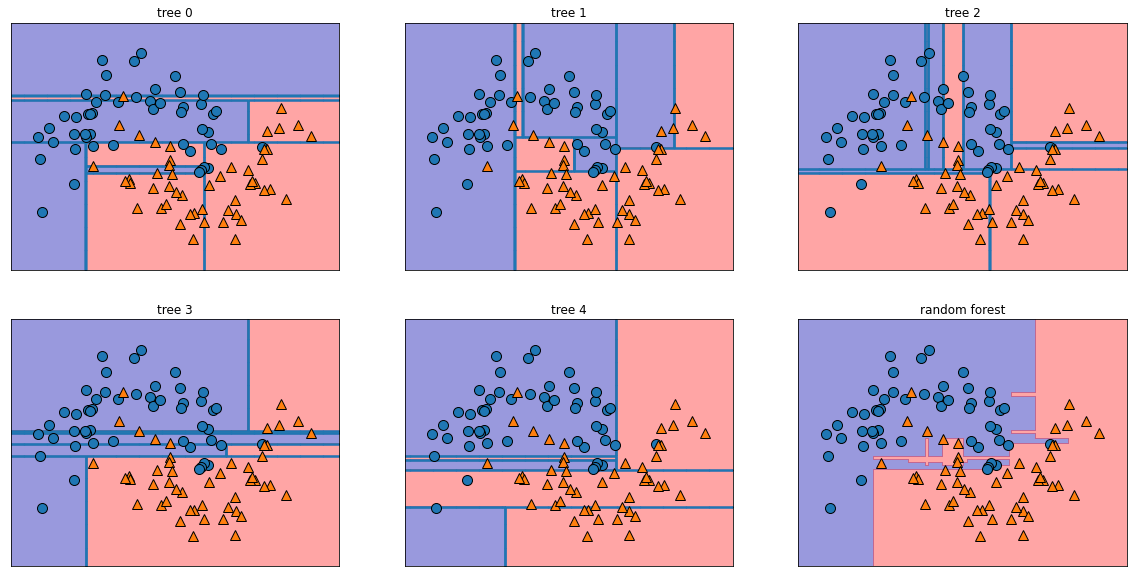

In [17]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [19]:
axes.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021595D254F0>,
      dtype=object)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


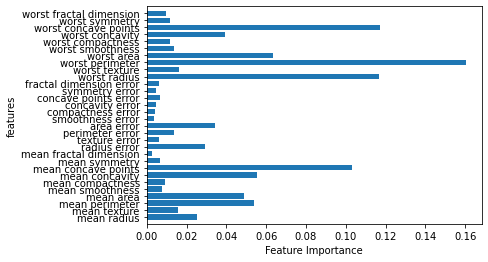

In [28]:
plot_feature_importances_cancer(forest)

2. 그래디언트 부스팅 회귀 트리 - 분류, 회귀

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [37]:
gbrt_model = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate = 0.1, n_estimators=100) # default 매개변수
# 참고로 그래디언트 부스팅 모델의 경우, n_estimators이 너무 커지면 과대적합되기 쉬우므로 건드리지 않는 것을 추천
gbrt_model.fit(X_train, y_train)
print("train set score : ", gbrt_model.score(X_train, y_train))
print("test set score : ", gbrt_model.score(X_test, y_test))

train set score :  1.0
test set score :  0.965034965034965


In [38]:
gbrt_model = GradientBoostingClassifier(random_state=0, max_depth=1) # max_depth가 얕을 수록 과대적합을 줄임
gbrt_model.fit(X_train, y_train)
print("train set score : ", gbrt_model.score(X_train, y_train))
print("test set score : ", gbrt_model.score(X_test, y_test))

train set score :  0.9906103286384976
test set score :  0.972027972027972


In [39]:
gbrt_model = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # learning_rate가 작을 수록 과대적합을 줄임
gbrt_model.fit(X_train, y_train)
print("train set score : ", gbrt_model.score(X_train, y_train))
print("test set score : ", gbrt_model.score(X_test, y_test))

train set score :  0.9882629107981221
test set score :  0.965034965034965


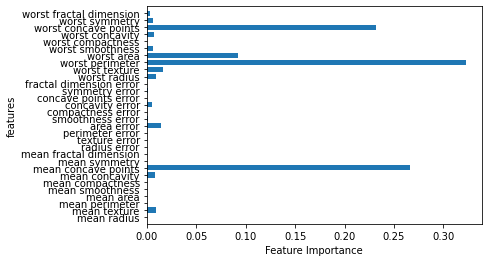

In [52]:
gbrt_model = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt_model.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt_model)